In [9]:
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

In [49]:
def CountNeighbours(M, grid, nneigh):
    count = 0
    for i in range(grid):
        for j in range(grid):
            #counts the number of neighbours of each cell
            for x in range(i-1, i+2): #horizontal neigbours
                for y in range(j-1, j+2): #vertical neighbours
                    if x>=0 and y>=0 and x<=grid-1 and y<= grid-1: #only considers cells within margins
                        if x==i and y==j:
                            pass
                        else:
                            count = count + M[x,y] #add 1 if state of cell is alive
                            #print(x, y, count)
            nneigh[i,j] = count
    return nneigh       

In [50]:
def UpdateGrid(M, grid, nneigh):
    for i in range(grid):
        for j in range(grid):
            if M[i,j] == 1:
                if nneigh[i,j] <2 or nneigh[i,j]>3:
                    M[i,j]=0
            else:
                if nneigh[i,j] == 3:
                     M[i,j]=1
    return M

In [57]:
def life(grid, ngen, pause_time):
    #Initialize agent and number of neighbours
    M = np.random.randint(0, 2, (grid,grid))
    nneigh = np.zeros((grid,grid))
    
    #Number of active cells in each generation
    activity = np.zeros(ngen)
    
    #Plot the initial agent matrix
    plot = plt.imshow(M, cmap='Greys')
    
    #Loop over number of generations
    for g in range(ngen):
        nneigh = CountNeighbours(M, grid, nneigh)
        M = UpdateGrid(M, grid, nneigh)
        activity[g] = sum(sum(M)) #number of active cells, updates in each generation
    

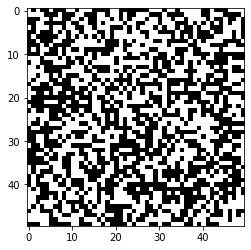

In [60]:
life(50, 50, 0.1)